In [6]:
import numpy as np
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
maxlen = 500
batch_size = 32
training_samples = 200

(input_train, y_train), (input_test, y_test) = imdb.load_data(
    num_words=max_features
)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape: ', input_train.shape)
print('input_test shape: ', input_test.shape)

# use 200 samples
# indices = np.arange(input_train.shape[0])
# np.random.shuffle(indices)
# input_train = input_train[indices]
# y_train = y_train[indices]
# 
# input_train = input_train[:training_samples]
# y_train = y_train[:training_samples]
# print('input_train shape: ', input_train.shape)

25000 train sequences
25000 test sequences
input_train shape:  (25000, 500)
input_test shape:  (25000, 500)


使用 keras 自带的 `SimpleRNN` 或者 `LSTM` 都非常慢，因为没有 GPU 加速。而 tensorflow v2 还没有 `CuDNNLSTM`，所以下面使用的是 tensorflow v1 的兼容版本。

In [7]:
from keras import models
from keras import layers
import tensorflow as tf

model = models.Sequential()
model.add(layers.Embedding(max_features, 32))
model.add(tf.compat.v1.keras.layers.CuDNNLSTM(32))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          320000    
                                                                 
 cu_dnnlstm_2 (CuDNNLSTM)    (None, 32)                8448      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 328481 (1.25 MB)
Trainable params: 328481 (1.25 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 41s 260ms/step - loss: 0.5138 - accuracy: 0.7603 - val_loss: 0.4500 - val_accuracy: 0.8024
Epoch 2/10
157/157 [==============================] - 32s 207ms/step - loss: 0.2935 - accuracy: 0.8864 - val_loss: 0.2839 - val_accuracy: 0.8846
Epoch 3/10
157/157 [==============================] - 27s 171ms/step - loss: 0.2335 - accuracy: 0.9123 - val_loss: 0.3462 - val_accuracy: 0.8792
Epoch 4/10
157/157 [==============================] - 24s 154ms/step - loss: 0.1959 - accuracy: 0.9287 - val_loss: 0.3359 - val_accuracy: 0.8828
Epoch 5/10
157/157 [==============================] - 21s 136ms/step - loss: 0.1766 - accuracy: 0.9369 - val_loss: 0.2860 - val_accuracy: 0.8810
Epoch 6/10
157/157 [==============================] - 21s 132ms/step - loss: 0.1581 - accuracy: 0.9451 - val_loss: 0.2995 - val_accuracy: 0.8888
Epoch 7/10
157/157 [==============================] - 20s 126ms/step - loss: 0.1414 - accuracy: 0.9512 - val_loss: 0.3298 - val_ac

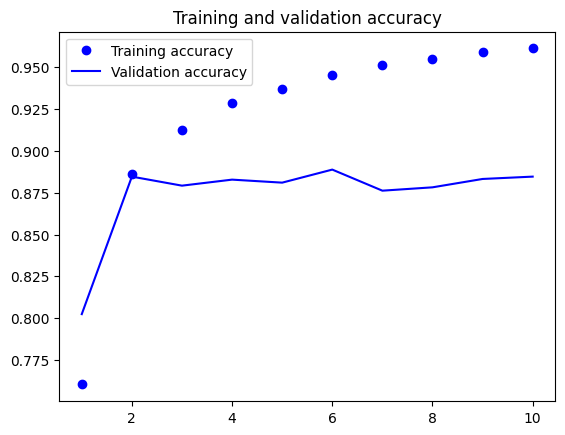

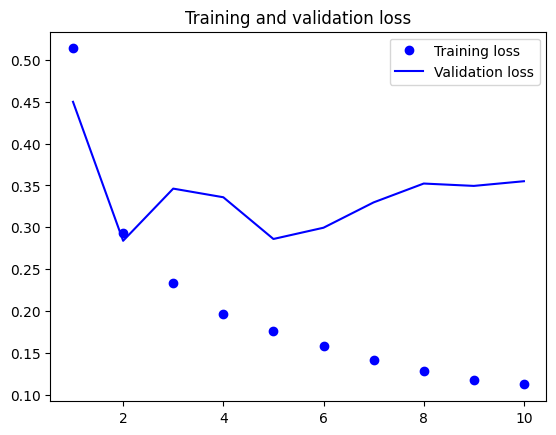

In [9]:
from plot_history import plot_history

plot_history(history)